##Likelihood PDF of Two-moon distribution

For the upper moon, $y=0$, the distribution $p(\mathbf{x}|\mathbf{y}=0)$ is given as
$$\frac{1}{2\pi^2\sigma^2} \exp\left(-\frac{x_1^2 + x_2^2 + 1}{2\sigma^2}\right) \int_0^{\pi} \exp\left(\frac{x_1\cos(t) + x_2\sin(t)}{\sigma^2}\right) dt$$

And for the lower moon, $\mathbf{y}=1$, the distribution $p(\mathbf{x}|\mathbf{y}=1)$ is given as
$$\frac{1}{2\pi^2\sigma^2} \exp\left(-\frac{(x_1 - 1)^2 + (x_2 - 0.5)^2 + 1}{2\sigma^2}\right) \int_0^{\pi} \exp\left(\frac{-(x_1 - 1)\cos(t) - (x_2 - 0.5)\sin(t)}{\sigma^2}\right) dt$$

Moreover, $P(\mathbf{y}=0) = P(\mathbf{y}=1) = 1/2$

In [1]:
from pdf import moon_upper, moon_lower

print(moon_upper(0.5, -0.5), moon_lower(0.5, -0.5))

0.005600651073462778 0.37437354005791396


In [2]:

import numpy as np

x1_values = np.linspace(-3, 3, 200)
x2_values = np.linspace(-3, 3, 200)
_d = np.diff(x1_values)[0]

X1, X2 = np.meshgrid(x1_values, x2_values)
sigma = 0.3  # Fixed sigma value

Z_p0 = moon_upper(X1, X2, sigma) * 0.5
Z_p1 = moon_lower(X1, X2, sigma) * 0.5


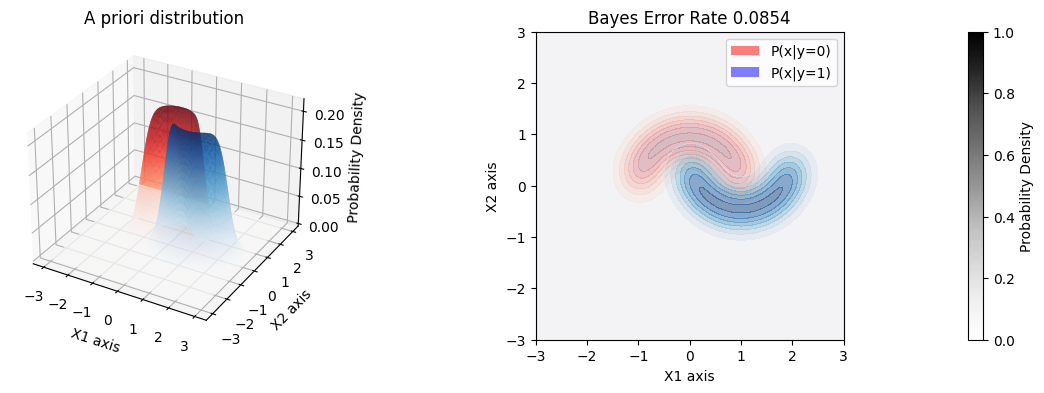

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 4))

# Subplot 1: 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf_Z1 = ax1.plot_surface(X1, X2, Z_p0, alpha=0.7, cmap='Reds', edgecolor='none', rcount=200, ccount=200)
surf_Z2 = ax1.plot_surface(X1, X2, Z_p1, alpha=0.7, cmap='Blues', edgecolor='none', rcount=200, ccount=200)
ax1.set_xlabel('X1 axis')
ax1.set_ylabel('X2 axis')
ax1.set_zlabel('Probability Density')
ax1.set_title('A priori distribution')

plt.subplots_adjust(wspace=0.3)

# Subplot 2: Contour plot
ax2 = fig.add_subplot(122)
ax2.set_box_aspect(1)
contour_Z1 = ax2.contourf(X1, X2, Z_p0, alpha=0.5, cmap='Reds')
contour_Z2 = ax2.contourf(X1, X2, Z_p1, alpha=0.5, cmap='Blues')
ax2.set_xlabel('X1 axis')
ax2.set_ylabel('X2 axis')

beta = 1 - np.maximum(Z_p0, Z_p1).sum() * _d ** 2
ax2.set_title(f'Bayes Error Rate {beta:.4f}')

legend_handles = [plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.5), plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.5)]
legend_labels = ['P(x|y=0)', 'P(x|y=1)']
ax2.legend(legend_handles, legend_labels)

sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.1)
cbar.set_label('Probability Density')

plt.show()

In [18]:
import numpy as np

x1_values = np.linspace(-3, 3, 200)
x2_values = np.linspace(-3, 3, 200)
_d = np.diff(x1_values)[0]

X1, X2 = np.meshgrid(x1_values, x2_values)
sigma = 0.3  # Fixed sigma value

Z_p0 = moon_upper(X1, X2, sigma) * 0.5
Z_p1 = moon_lower(X1, X2, sigma) * 0.5


In [19]:
from pdf import moon_upper_conv, moon_lower_conv
print(moon_upper_conv(0.5, -0.5), moon_lower_conv(0.5, -0.5))

0.006898811547625846 0.36194218342609336


In [20]:
kappa = 0.1
epsilon = 0.15

In [21]:
epsilon_s = 0.15 * (1 - (2*kappa)**0.5)
print(epsilon_s)

Z_q0 = moon_upper_conv(X1, X2, sigma, epsilon_s) * 0.5
Z_q1 = moon_lower_conv(X1, X2, sigma, epsilon_s) * 0.5

0.08291796067500631


In [22]:
# @title Vicinity

import numpy as np

def v_vectorized(x1, x2, epsilon=0.15, kappa = 0):
    epsilon = epsilon * (1 - (2*kappa)**0.5)
    return np.where(
        (x1 >= -epsilon) & (x1 <= epsilon) & (x2 >= -epsilon) & (x2 <= epsilon),
        1, # / (4 * epsilon ** 2),
        0
    )


In [ ]:
#@title compute upper bound
from scipy.signal import fftconvolve


zetas = []
for kappa in np.linspace(0, 0.5, 50):
    epsilon_s = 0.15 * (1 - (2*kappa)**0.5)
    print(f'kappa = {kappa}, smaller epsilon = {round(epsilon_s, 4)}')

    Z_q0 = moon_upper_conv(X1, X2, sigma, epsilon_s) * 0.5
    Z_q1 = moon_lower_conv(X1, X2, sigma, epsilon_s) * 0.5

    V = v_vectorized(X1, X2, kappa=kappa).round().astype(int)
    # W_q0 = fftconvolve(Z_p0, V, mode='same') / V.sum()
    # W_q1 = fftconvolve(Z_p1, V, mode='same') / V.sum()

    # W_q0[W_q0<1e-4] = 0
    # W_q1[W_q1<1e-4] = 0

    S_ = fftconvolve(Z_q0 > Z_q1, V, mode='same') / V.sum()
    S = ((S_-S_.round())<1e-3)

    beta = (S * np.maximum(Z_q0, Z_q1)).sum() * _d ** 2
    print(beta)
    zetas.append(beta)

kappa = 0.0, smaller epsilon = 0.15
0.8534769967515431
kappa = 0.01020408163265306, smaller epsilon = 0.1286
0.8694940060267012
kappa = 0.02040816326530612, smaller epsilon = 0.1197
0.8702317513550053
kappa = 0.030612244897959183, smaller epsilon = 0.1129
0.8709419871096182
kappa = 0.04081632653061224, smaller epsilon = 0.1071
0.8711972103397997
kappa = 0.0510204081632653, smaller epsilon = 0.1021
0.8845224147346822
kappa = 0.061224489795918366, smaller epsilon = 0.0975


In [ ]:
zetas

[0.8532308255917286,
 0.8705763022009501,
 0.8705763022009501,
 0.8705763022009501,
 0.8705763022009501,
 0.8852384363611858,
 0.8852384363611858,
 0.8852384363611858,
 0.8852384363611858,
 0.8852384363611858,
 0.8852384363611858,
 0.8852384363611858,
 0.8852384363611858,
 0.8986533617064011,
 0.8986533617064011,
 0.8986533617064011,
 0.8986533617064011,
 0.8986533617064011,
 0.8986533617064011,
 0.8986533617064011,
 0.8986533617064011,
 0.8986533617064011,
 0.8986533617064011,
 0.8986533617064011,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 0.9099162138309612,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [ ]:
_d = np.diff(x1_values)[0]
print(_d)

0.03015075376884413
